In [4]:
import sys

sys.path.append("../src/")
sys.path.append("../src/AtomicT")


In [5]:

from AtomicH import dipolelosses
from AtomicH import potentials
from AtomicH import constants
import numpy as np
import pylab as plt
from AtomicH.dipolelosses import DipoleChannels

In [6]:
PWaves=         [[0, 2],[2, 0],[2, 2],[2, 4],[4, 2],[4, 4],[4, 6],[6,4],[6,6],[6,8]]

c=DipoleChannels[0]

B_values = np.logspace(-3,100,50)

pot      = potentials.Silvera_Triplet
T_values = np.logspace(-3,2,50)
B_value  = 1e-5

SummedG=[]
for T in T_values:
    SummedG.append(dipolelosses.GetSummedGFactor(c, B_value, constants.HydrogenConstants, T, pot,PWaves,dm=2, rhos=np.linspace(1e-9,0.75,2000)))
SummedG=np.array(SummedG)

/Users/benjpjones/PycharmProjects/AtomicHScattering/examples/../src/AtomicH/dipolelosses.py:67: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Integral = quad(Integrand, rhos[0], rhos[-1])[0] / (P1 * P2)


In [7]:
GVsB_PW_H=[]


for PW in PWaves:
    Gs=[]
    for T in T_values:
        Gs.append(dipolelosses.GetGFactor(c,  B_value, constants.HydrogenConstants, T, pot,rhos=np.linspace(1e-9,0.75,2000),lin=PW[0],lout=PW[1]))
    GVsB_PW_H.append(np.array(Gs))

In [8]:
plt.figure(figsize=(5,5),dpi=150)

for iPW in range(0,len(PWaves)):
    plt.plot(T_values,dipolelosses.GetCrossSection(GVsB_PW_H[iPW],1,T_values),label=str(PWaves[iPW]))
plt.plot(T_values, dipolelosses.GetCrossSection(SummedG,1,T_values),linewidth=2,color='black',label='total')
plt.semilogy()
plt.xlabel("T (K)")
#plt.xlim(0.001, 10)
plt.ylabel(r'Cross Section (a.u.$^2$)')
#plt.ylim(1e-19, 1e-15)
plt.title("Hydrogen partial waves, dd->aa")
plt.grid(which='both')
plt.legend(ncol=3)
plt.loglog()
plt.ylim(1e-6,1e-1)

plt.show()

AttributeError: module 'dipolelosses' has no attribute 'GetCrossSection'

<Figure size 750x750 with 0 Axes>

In [30]:
#Only showing the most important ones
GVsB_PW_T=[]
PWaves=        PWaves=         [[0, 2],[2, 0],[2, 2],[2, 4],[4, 2],[4, 4],[4, 6],[6,4],[6,6],[6,8]]



for PW in PWaves:
    Gs=[]
    for T in T_values:
        Gs.append(dipolelosses.GetGFactor(c,  B_value, constants.TritiumConstants, T, pot,lin=PW[0],lout=PW[1],rhos=np.linspace(1e-9,0.75,2000),))
    GVsB_PW_T.append(np.array(Gs))

In [31]:
SummedGT=[]
for T in T_values:
    SummedGT.append(dipolelosses.GetSummedGFactor(c, B_value, constants.TritiumConstants, T, pot,PWaves, 2,rhos=np.linspace(1e-9,0.75,2000)))
SummedGT=np.array(SummedGT)

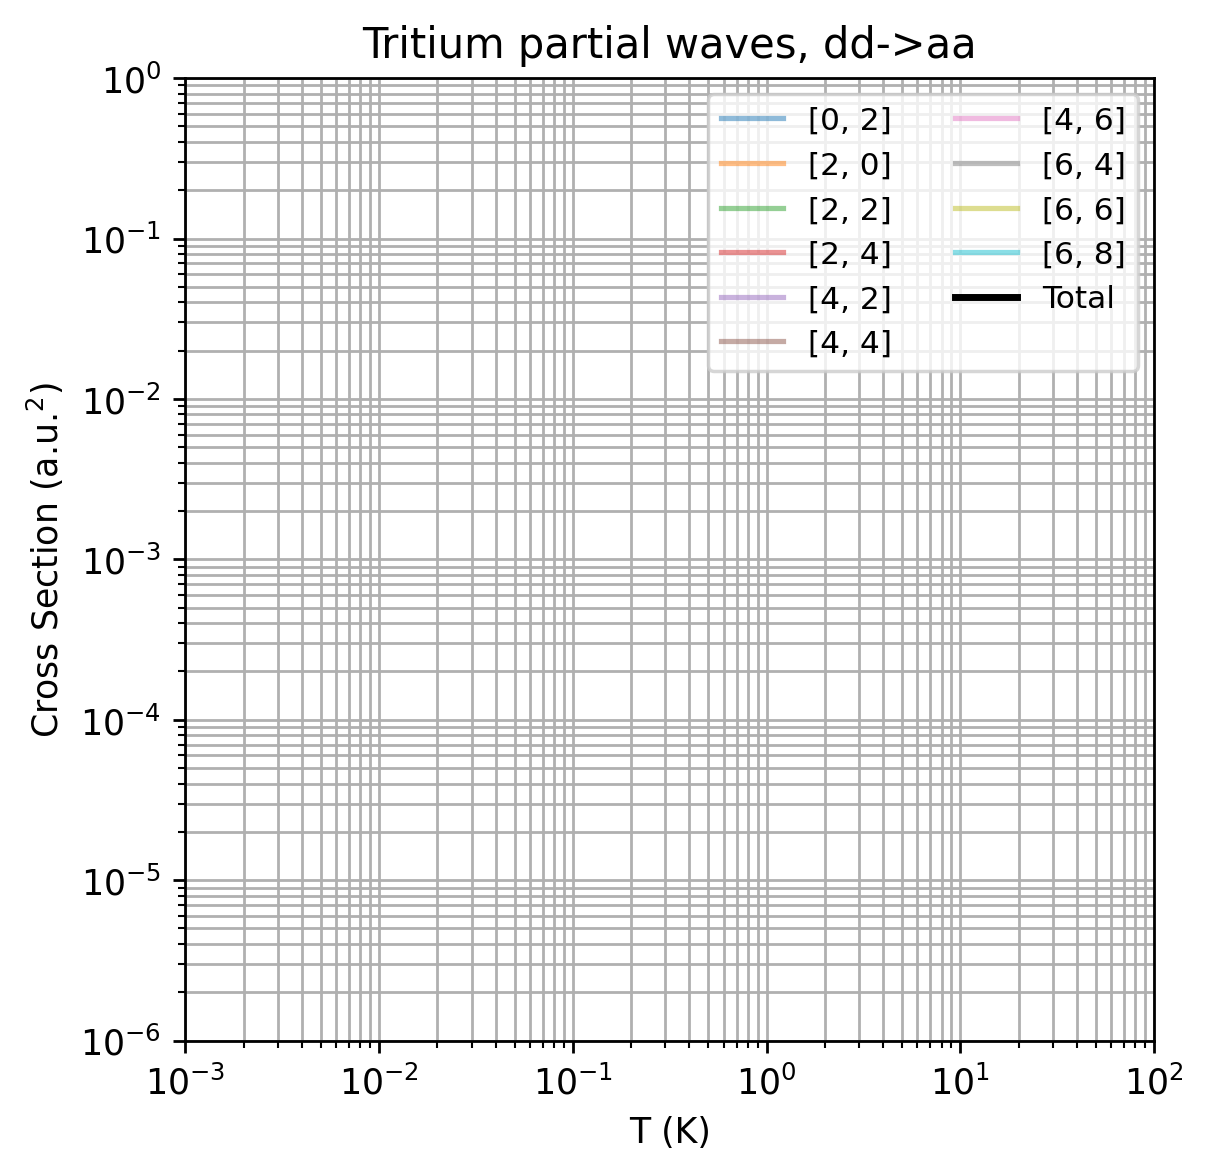

In [32]:

plt.figure(figsize=(5,5),dpi=250)
#PWaves=         [[0, 2],[0,4],[0,6],[2, 0],[2, 2],[2, 4],[2,6],[4, 2],[4, 4],[4, 6],[6,2],[6,4]]

PWaves=       [[0, 2],[2, 0],[2, 2],[2, 4],[4, 2],[4, 4],[4, 6],[6,4],[6,6],[6,8]]

for iPW in range(0,len(PWaves)):
    plt.plot(T_values,dipolelosses.GetCrossSection(GVsB_PW_T[iPW],3,T_values),label=str(PWaves[iPW]),alpha=0.5)
plt.plot(T_values, dipolelosses.GetCrossSection(SummedGT,3,T_values),linewidth=2,color='black',label='Total')
plt.semilogy()
plt.xlabel("T (K)")
#plt.xlim(0.001, 10)
plt.ylabel(r'Cross Section (a.u.$^2$)')
#plt.ylim(1e-19, 1e-15)
plt.title("Tritium partial waves, dd->aa")
plt.grid(which='both')
plt.legend(ncol=2,fontsize=9)
plt.loglog()
#plt.ylim(1e-6,1)
#plt.xlim(1e-3,1e2)
plt.savefig("Plots/TTPartialsDipole.png",dpi=250,bbox_inches='tight')
plt.show()

In [26]:
import spinexchange
c=spinexchange.SpinExChannels[0]
PWaves=       [0,2,4,6,8]
GVsB_PW_T=[]
potT=potentials.Silvera_Triplet
potS=potentials.Jamieson_Singlet_VDW
for PW in PWaves:
    Gs=[]
    for T in T_values:
        Gs.append(spinexchange.GetGFactor(c,  B_value, constants.HydrogenConstants, T, potT,potS,rhos=np.linspace(1e-9,0.75,2000),l=PW))
    GVsB_PW_T.append(np.array(Gs))
plt.figure(figsize=(5,5),dpi=250)
#PWaves=         [[0, 2],[0,4],[0,6],[2, 0],[2, 2],[2, 4],[2,6],[4, 2],[4, 4],[4, 6],[6,2],[6,4]]



<Figure size 1250x1250 with 0 Axes>

<Figure size 1250x1250 with 0 Axes>

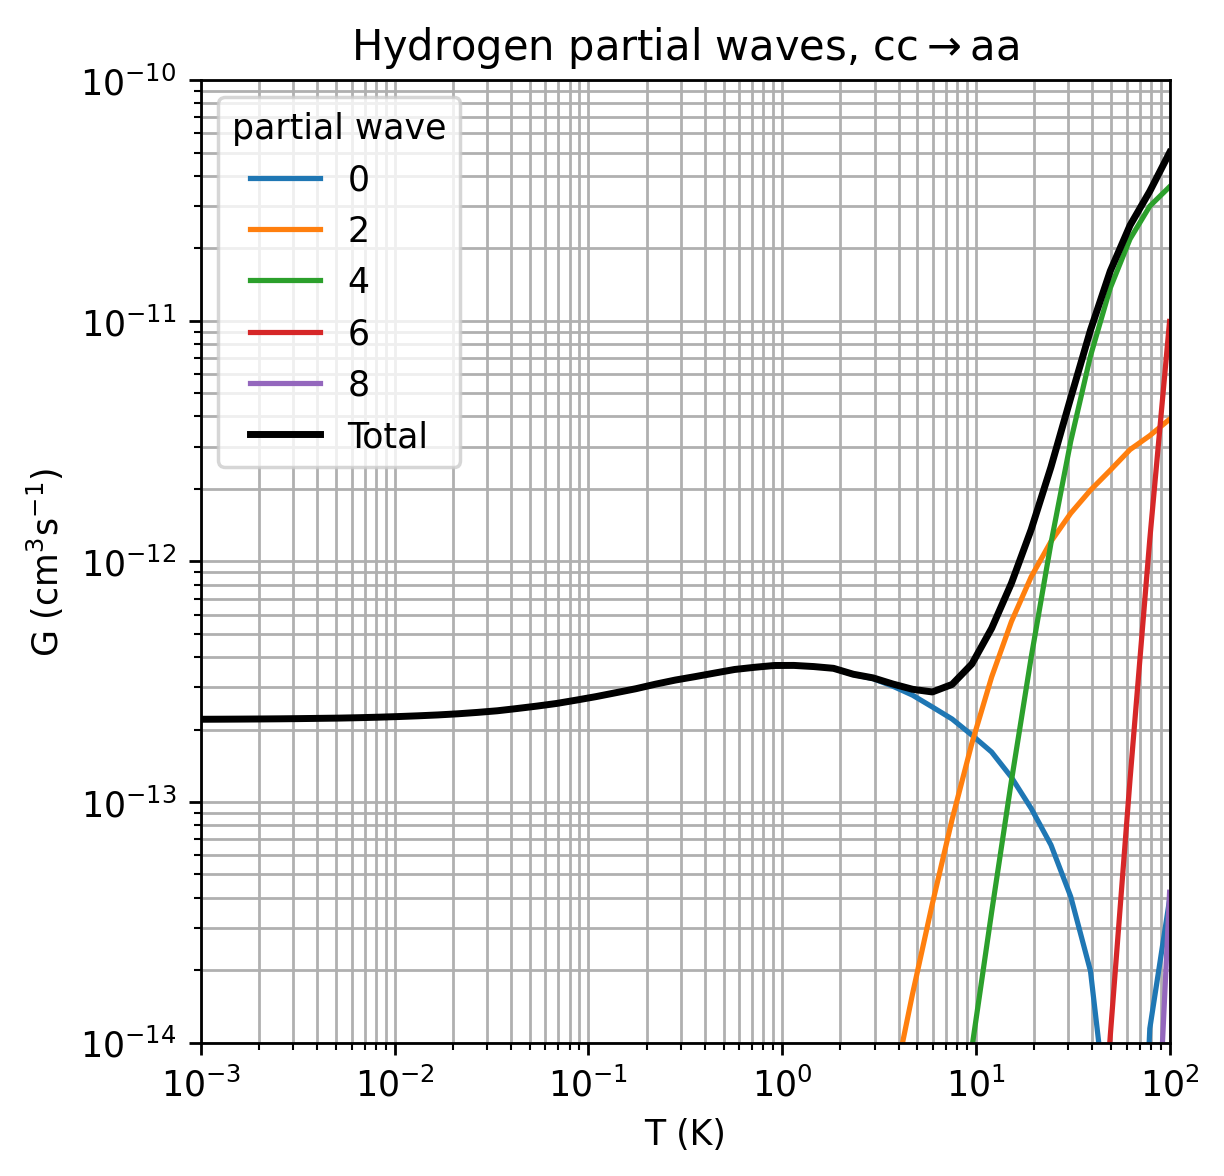

In [27]:
plt.figure(figsize=(5,5),dpi=250)
Total=np.sum(np.array(GVsB_PW_T),axis=0)
for iPW in range(0,len(PWaves)):
    plt.plot(T_values,GVsB_PW_T[iPW],label=str(PWaves[iPW]),alpha=1)
plt.plot(T_values,Total,linewidth=2,color='black',label='Total')
plt.semilogy()
plt.xlabel("T (K)")
#plt.xlim(0.001, 10)
plt.ylabel(r'G (cm$^3$s$^{-1}$)')
#plt.ylim(1e-19, 1e-15)
plt.title(r"Hydrogen partial waves, cc$\rightarrow$aa")
plt.grid(which='both')
plt.legend(title='partial wave')
plt.loglog()
#plt.ylim(1e-6,1)
plt.xlim(1e-3,1e2)
plt.ylim(1e-14,1e-10)
plt.savefig("Plots/HHPartialSpinEx.png",dpi=250,bbox_inches='tight')
